# EMOTION ANALYSIS 

# Data Preprocessing and Cleaning

In [1]:
import re
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (lib, index as libindex, tslib as libts,
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\tseries\offsets.py:21: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  import pandas._libs.tslibs.offsets as liboffsets


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\ops.py:16: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos as libalgos, ops as libops
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\indexes\interval.py:32: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs.interval import (


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\internals.py:14: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import internals as libinternals
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\sparse\array.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  import pandas._libs.sparse as splib


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\window.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  import pandas._libs.window as _window
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\groupby\groupby.py:68: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (lib, reduction,
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\reshape\reshape.py:30: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos as _algos, reshape as _reshape


C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\io\parsers.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  import pandas._libs.parsers as parsers
C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\io\pytables.py:50: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib, writers as libwriters


In [3]:
import pandas as pd 
train  = pd.read_csv('C:/Users/Irfan/PycharmProjects/HateSpeechAnalysis/emotion analysis MM/kaggletrain.csv')
test = pd.read_csv('C:/Users/Irfan/PycharmProjects/HateSpeechAnalysis/emotion analysis MM/kaggletest.csv')
print len(train)
train.head()
train.count()

5970


Id          5970
Category    5970
Tweet       5970
dtype: int64

In [4]:
combi = train.append(test, ignore_index=True)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'', input_txt)
        
    return input_txt

C:\Users\Irfan\PycharmProjects\HateSpeechAnalysis\venv\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


# remove the duplicate tweet

In [5]:
train=train[~train['Tweet'].duplicated()]
train=train.reset_index(drop=True)
print len(train)
print train.Tweet[1]
train.head()

5418
IOS 9 App Transport Security. Mm need to check if my 3rd party network pod supports it http://t.co/fmtcfUAdgj


,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


# convert data to lowercase

In [6]:
import string
for i in range(len(train)):
    text = string.lower(train['Tweet'].iloc[i])
    train['Tweet'].iloc[i]=text
print train['Tweet'][2]
train.head()

mar if you have an ios device, you should download our app too: http://t.co/gl3tn2udnd


,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios 9 app transport security. mm need to check...
2,635950258682523648,neutral,"mar if you have an ios device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,not sure how to start your publication on ios?...


# remove RT and URL

In [7]:
pattern=r'rt @\w+: '     #remove RT
for i in range(len(train)):
    train['Tweet'].iloc[i] = re.sub(pattern,'',train['Tweet'].iloc[i], flags=re.MULTILINE)
    
                  #remove URL
pattern=r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'
for i in range(len(train)):
    train['Tweet'].iloc[i] = re.sub(pattern,'',train['Tweet'].iloc[i], flags=re.MULTILINE)
print train.Tweet[1]
train.head()   

ios 9 app transport security. mm need to check if my 3rd party network pod supports it 


,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios 9 app transport security. mm need to check...
2,635950258682523648,neutral,"mar if you have an ios device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,not sure how to start your publication on ios?...


# stop word removal

In [8]:
import string
import re
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.tokenize import TweetTokenizer

# remove number

In [9]:
import re
pattern=r'[0-9]+'
for i in range(len(train)):
    train['Tweet'].iloc[i] = re.sub(pattern,'',train['Tweet'].iloc[i], flags=re.MULTILINE)
print train['Tweet'][0]
train.head()

not available


,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios app transport security. mm need to check ...
2,635950258682523648,neutral,"mar if you have an ios device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,not sure how to start your publication on ios?...


# Remove  (@) Handles

In [12]:
#remove @
pattern=r'@\w+ '
for i in range(len(train)):
    train['Tweet'].iloc[i] = re.sub(pattern,'',train['Tweet'].iloc[i], flags=re.MULTILINE)
train.head()

,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios app transport security. mm need to check ...
2,635950258682523648,neutral,"mar if you have an ios device, you should down..."
3,636030803433009153,negative,my phone does not run on latest ios which may ...
4,636100906224848896,positive,not sure how to start your publication on ios?...


# remove bad character

In [13]:
#[^A-Za-z ]
import re
pattern=r'[^A-Za-z ]'
for i in range(len(train)):
    train['Tweet'].iloc[i] = re.sub(pattern,'',train['Tweet'].iloc[i], flags=re.MULTILINE)
print train['Tweet'][1]
train.head()

ios  app transport security mm need to check if my rd party network pod supports it 


,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios app transport security mm need to check i...
2,635950258682523648,neutral,mar if you have an ios device you should downl...
3,636030803433009153,negative,my phone does not run on latest ios which may ...
4,636100906224848896,positive,not sure how to start your publication on ios ...


# Remove Punctuations

In [14]:
# remove punctuation 
import string
string.punctuation
remove=string.punctuation
for i in range(len(train)):''
sent=train['Tweet'].iloc[i]
kd=' '.join(word.strip(remove) for word in sent.split())
train['Tweet'].iloc[i]=kd
print train.Tweet[0]
train.head()

not available


,Id,Category,Tweet
0,635769805279248384,negative,not available
1,635930169241374720,neutral,ios app transport security mm need to check i...
2,635950258682523648,neutral,mar if you have an ios device you should downl...
3,636030803433009153,negative,my phone does not run on latest ios which may ...
4,636100906224848896,positive,not sure how to start your publication on ios ...


# Tokenization

In [24]:
import nltk
nltk.download('punkt')
TextBlob(train['Tweet'][1]).words     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irfan\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt is already up-to-date!


NameError: name 'TextBlob' is not defined

# Stemming

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
train = train.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
train.head()

,Id,Category,Tweet
0,635769805279248384,neg,not avail
1,635930169241374720,neutral,ios app transport security mm need to check i...
2,635950258682523648,neutral,mar if you have an ios device you should downl...
3,636030803433009153,neg,my phone does not run on latest ios which may ...
4,636100906224848896,posit,not sure how to start your publication on ios ...


# A) Understanding the common words used in the tweets: WordCloud

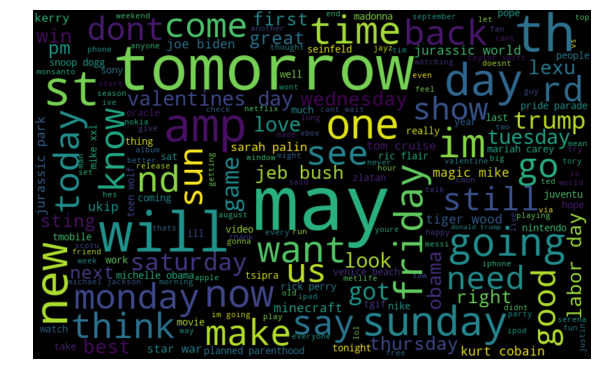

In [19]:
all_words = ' '.join([text for text in train['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# Extracting Features from Cleaned Tweets

# Bag-of-Words Features

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train.Tweet)
print train_counts.shape
count_vect.vocabulary_

(5418, 11962)


{u'raining': 8359,
 u'four': 3966,
 u'woods': 11729,
 u'hanging': 4589,
 u'marching': 6307,
 u'looking': 6104,
 u'forza': 3956,
 u'unblocked': 11081,
 u'eligible': 3257,
 u'otra': 7428,
 u'opener': 7348,
 u'packers': 7502,
 u'smbsif': 9630,
 u'lord': 6111,
 u'herbicide': 4736,
 u'whoops': 11612,
 u'schalke': 9100,
 u'sinking': 9538,
 u'mlb': 6680,
 u'digit': 2816,
 u'hormone': 4893,
 u'gccelvaq': 4189,
 u'regional': 8546,
 u'portugals': 7941,
 u'climate': 1907,
 u'dvdbluray': 3138,
 u'bringing': 1292,
 u'lumia': 6181,
 u'prize': 8106,
 u'wednesday': 11523,
 u'postexistence': 7956,
 u'debuting': 2590,
 u'commented': 2046,
 u'tired': 10678,
 u'politicsdont': 7906,
 u'miller': 6609,
 u'snuggles': 9681,
 u'mail': 6241,
 u'elexauerbach': 3254,
 u'scheming': 9106,
 u'second': 9194,
 u'fullarton': 4079,
 u'scraped': 9150,
 u'cobbling': 1958,
 u'hilariously': 4778,
 u'brexit': 1278,
 u'roddy': 8866,
 u'thunder': 10621,
 u'mustsee': 6889,
 u'fingers': 3780,
 u'unistudios': 11122,
 u'fossil': 39

# TF-IDF Features

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)
print train_tfidf.shape
print(tfidf_transformer.fit_transform(count_vect.fit_transform(train.Tweet)).toarray())

(5418, 11962)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
y_emotion =train['Tweet']